<a href="https://colab.research.google.com/github/ViniciusPrincipe/BitcoinPrediction-LSTM/blob/main/BtcLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import io
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
import sklearn.metrics as sk

In [2]:
df = pd.read_csv('/content/btc.csv')

dfLimpo = df['Close'].values
dfLimpo = dfLimpo[::-1]

In [3]:
len(dfLimpo)

1273

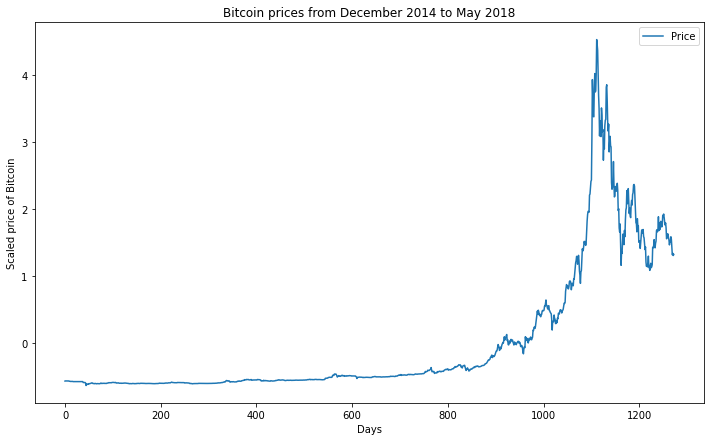

In [4]:
#data preprocessing(scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfLimpo.reshape(-1, 1))
#plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(scaled_data, label='Price')
plt.legend()
plt.show()

In [5]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [6]:
def model_evaluation(model,x_test,y_test):
  y_pred = model.predict(x_test)
  y_testNorm = scaler.fit_transform(y_test.reshape(-1, 1))
  y_predNorm = scaler.fit_transform(y_pred.reshape(-1, 1))

  mse = sk.mean_squared_error(y_testNorm, y_predNorm)
  rmse = np.sqrt(mse)
  mae = sk.mean_absolute_error(y_testNorm, y_predNorm)
  r2 = sk.r2_score(y_testNorm, y_predNorm)

  # Print the evaluation metrics
  print("Mean squared error: ", mse)
  print("Root mean squared error: ", rmse)
  print("Mean absolute error: ", mae)
  print("R2 score: ", r2)

  # Plot the predictions and actual values
  plt.plot(y_testNorm, label='Actual')
  plt.plot(y_predNorm, label='Predicted')
  plt.xlabel('Time')
  plt.ylabel('Closing Price')
  plt.legend()
  plt.show()

In [7]:
def plot_history(history):
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

Modelo 1: window_size = 7

In [8]:
#Criando datasets usando uma janela com 7 pontos
window_size = 7
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 7, 1)
y_train size: (886, 1)
X_val size: (127, 7, 1)
y_val size: (127, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)


In [9]:
#Configurações globais para todos os modelos
early_stop_val = EarlyStopping(monitor= 'val_loss',  patience= 6)
early_stop_train = EarlyStopping(monitor = 'loss',patience = 8)

Epoch 1/250
111/111 [==============================] - 4s 17ms/step - loss: 0.0154 - val_loss: 0.0470
Epoch 2/250
111/111 [==============================] - 1s 10ms/step - loss: 4.3786e-04 - val_loss: 0.0348
Epoch 3/250
111/111 [==============================] - 1s 12ms/step - loss: 2.2662e-04 - val_loss: 0.0253
Epoch 4/250
111/111 [==============================] - 1s 12ms/step - loss: 1.3063e-04 - val_loss: 0.0201
Epoch 5/250
111/111 [==============================] - 2s 16ms/step - loss: 1.0019e-04 - val_loss: 0.0180
Epoch 6/250
111/111 [==============================] - 2s 16ms/step - loss: 9.2716e-05 - val_loss: 0.0169
Epoch 7/250
111/111 [==============================] - 1s 11ms/step - loss: 9.4834e-05 - val_loss: 0.0163
Epoch 8/250
111/111 [==============================] - 2s 14ms/step - loss: 9.8633e-05 - val_loss: 0.0158
Epoch 9/250
111/111 [==============================] - 1s 12ms/step - loss: 9.8034e-05 - val_loss: 0.0156
Epoch 10/250
111/111 [============================

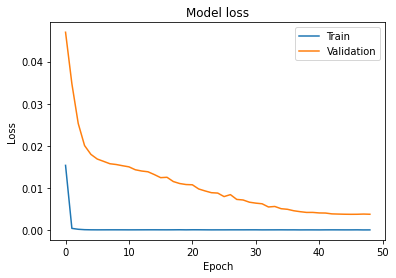

8/8 [==============================] - 1s 4ms/step
Mean squared error:  0.2308673808918666
Root mean squared error:  0.48048660844176144
Mean absolute error:  0.36969650061058856
R2 score:  0.7691326191081334


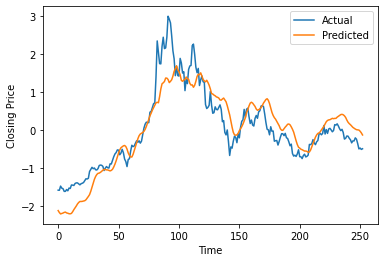

In [10]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_val])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
111/111 [==============================] - 4s 11ms/step - loss: 0.2352 - val_loss: 0.0615
Epoch 2/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2326 - val_loss: 0.0613
Epoch 3/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2300 - val_loss: 0.0612
Epoch 4/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2274 - val_loss: 0.0611
Epoch 5/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2249 - val_loss: 0.0609
Epoch 6/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2223 - val_loss: 0.0608
Epoch 7/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2198 - val_loss: 0.0607
Epoch 8/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2174 - val_loss: 0.0605
Epoch 9/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2149 - val_loss: 0.0604
Epoch 10/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2124 - val_l

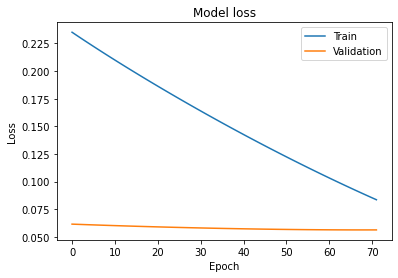

8/8 [==============================] - 1s 5ms/step
Mean squared error:  0.48032346309228446
Root mean squared error:  0.6930537230924342
Mean absolute error:  0.5436719968097325
R2 score:  0.5196765369077155


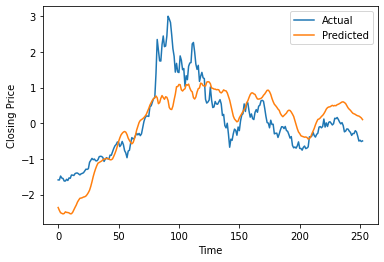

In [11]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_val])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
111/111 [==============================] - 4s 11ms/step - loss: 0.0141 - val_loss: 0.0449
Epoch 2/250
111/111 [==============================] - 1s 6ms/step - loss: 4.3085e-04 - val_loss: 0.0326
Epoch 3/250
111/111 [==============================] - 1s 7ms/step - loss: 2.1693e-04 - val_loss: 0.0236
Epoch 4/250
111/111 [==============================] - 1s 7ms/step - loss: 1.2006e-04 - val_loss: 0.0178
Epoch 5/250
111/111 [==============================] - 1s 7ms/step - loss: 9.3413e-05 - val_loss: 0.0157
Epoch 6/250
111/111 [==============================] - 1s 7ms/step - loss: 8.8622e-05 - val_loss: 0.0148
Epoch 7/250
111/111 [==============================] - 1s 6ms/step - loss: 8.5718e-05 - val_loss: 0.0146
Epoch 8/250
111/111 [==============================] - 1s 6ms/step - loss: 9.8994e-05 - val_loss: 0.0143
Epoch 9/250
111/111 [==============================] - 1s 6ms/step - loss: 8.8513e-05 - val_loss: 0.0139
Epoch 10/250
111/111 [==============================] - 1s

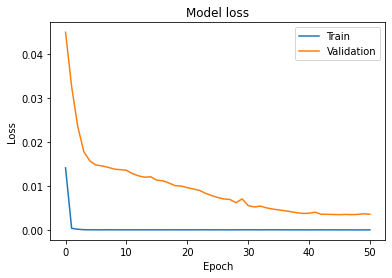

8/8 [==============================] - 1s 4ms/step
Mean squared error:  0.15903099377382282
Root mean squared error:  0.39878690271098777
Mean absolute error:  0.30577921702743727
R2 score:  0.8409690062261772


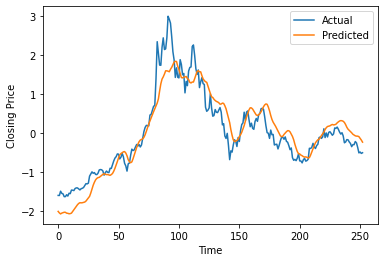

In [12]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_val])
plot_history(history)
model_evaluation(model,x_test,y_test)

Modelo 2: window_size = 7

Epoch 1/250
111/111 [==============================] - 5s 23ms/step - loss: 0.2587 - val_loss: 0.0656
Epoch 2/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2523 - val_loss: 0.0649
Epoch 3/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2461 - val_loss: 0.0643
Epoch 4/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2399 - val_loss: 0.0636
Epoch 5/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2338 - val_loss: 0.0630
Epoch 6/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2278 - val_loss: 0.0624
Epoch 7/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2218 - val_loss: 0.0618
Epoch 8/250
111/111 [==============================] - 1s 13ms/step - loss: 0.2159 - val_loss: 0.0612
Epoch 9/250
111/111 [==============================] - 2s 19ms/step - loss: 0.2101 - val_loss: 0.0606
Epoch 10/250
111/111 [==============================] - 2s 16ms/step - loss: 0.204

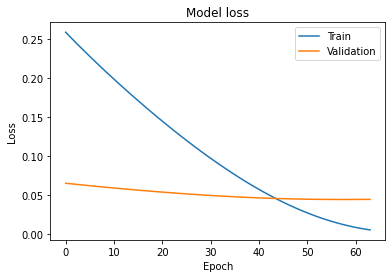

8/8 [==============================] - 0s 6ms/step
Mean squared error:  0.23215424437667426
Root mean squared error:  0.4818238727758041
Mean absolute error:  0.37554694532491945
R2 score:  0.7678457556233258


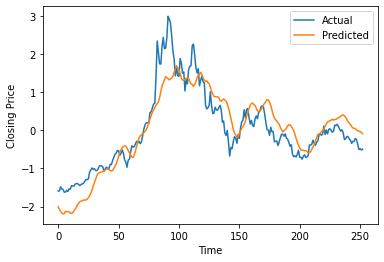

In [13]:
model2 = Sequential()
model2.add(LSTM(150, input_shape=(window_size, 1)))
model2.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model2.compile(loss='mean_squared_error', optimizer= optimizer)

history = model2.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model2,x_test,y_test)

Modelo 3: window_size = 5

In [14]:
#Criando datasets usando uma janela com 5 pontos
window_size = 5
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 5, 1)
y_train size: (886, 1)
X_val size: (127, 5, 1)
y_val size: (127, 1)
X_test size: (255, 5, 1)
y_test size: (255, 1)


Epoch 1/250
111/111 [==============================] - 4s 11ms/step - loss: 0.2421 - val_loss: 0.0594
Epoch 2/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2303 - val_loss: 0.0589
Epoch 3/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2188 - val_loss: 0.0584
Epoch 4/250
111/111 [==============================] - 1s 8ms/step - loss: 0.2076 - val_loss: 0.0580
Epoch 5/250
111/111 [==============================] - 1s 7ms/step - loss: 0.1967 - val_loss: 0.0576
Epoch 6/250
111/111 [==============================] - 1s 6ms/step - loss: 0.1862 - val_loss: 0.0573
Epoch 7/250
111/111 [==============================] - 1s 7ms/step - loss: 0.1759 - val_loss: 0.0570
Epoch 8/250
111/111 [==============================] - 1s 6ms/step - loss: 0.1659 - val_loss: 0.0568
Epoch 9/250
111/111 [==============================] - 1s 6ms/step - loss: 0.1561 - val_loss: 0.0566
Epoch 10/250
111/111 [==============================] - 1s 6ms/step - loss: 0.1467 - val_l

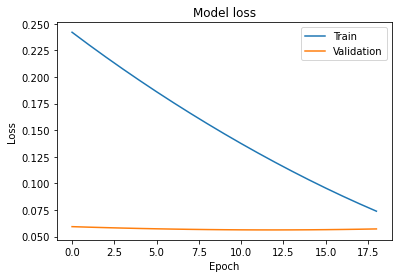

8/8 [==============================] - 1s 4ms/step
Mean squared error:  0.16175907368090076
Root mean squared error:  0.40219283146383994
Mean absolute error:  0.3133188254791861
R2 score:  0.8382409263190993


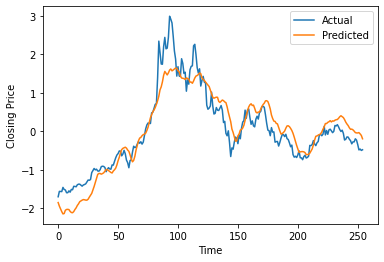

In [15]:
model3 = Sequential()
model3.add(LSTM(50, input_shape=(window_size, 1)))
model3.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000005)
model3.compile(loss='mean_squared_error', optimizer= optimizer)

history = model3.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model3,x_test,y_test)

modelo 4: window_size = 5

Epoch 1/250
111/111 [==============================] - 4s 14ms/step - loss: 0.2978 - val_loss: 0.0734
Epoch 2/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2923 - val_loss: 0.0730
Epoch 3/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2868 - val_loss: 0.0725
Epoch 4/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2814 - val_loss: 0.0720
Epoch 5/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2761 - val_loss: 0.0715
Epoch 6/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2708 - val_loss: 0.0710
Epoch 7/250
111/111 [==============================] - 2s 15ms/step - loss: 0.2656 - val_loss: 0.0706
Epoch 8/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2604 - val_loss: 0.0701
Epoch 9/250
111/111 [==============================] - 1s 10ms/step - loss: 0.2552 - val_loss: 0.0697
Epoch 10/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2501 -

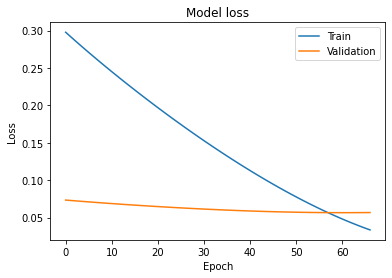

8/8 [==============================] - 1s 5ms/step
Mean squared error:  0.16525345109008419
Root mean squared error:  0.4065137772451066
Mean absolute error:  0.31259546316178827
R2 score:  0.8347465489099158


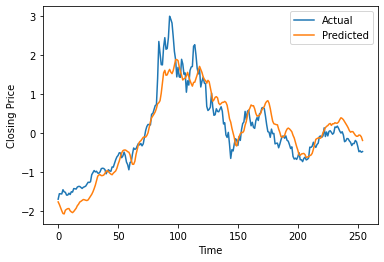

In [16]:
model4 = Sequential()
model4.add(LSTM(150, input_shape=(window_size, 1)))
model4.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model4.compile(loss='mean_squared_error', optimizer= optimizer)

history = model4.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model4,x_test,y_test)

Modelo 5: window_size = 3

In [17]:
window_size = 3
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 3, 1)
y_train size: (886, 1)
X_val size: (127, 3, 1)
y_val size: (127, 1)
X_test size: (257, 3, 1)
y_test size: (257, 1)


Epoch 1/250
111/111 [==============================] - 4s 15ms/step - loss: 0.3022 - val_loss: 0.0734
Epoch 2/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2945 - val_loss: 0.0733
Epoch 3/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2870 - val_loss: 0.0732
Epoch 4/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2796 - val_loss: 0.0731
Epoch 5/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2723 - val_loss: 0.0730
Epoch 6/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2651 - val_loss: 0.0729
Epoch 7/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2581 - val_loss: 0.0729
Epoch 8/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2511 - val_loss: 0.0728
Epoch 9/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2442 - val_loss: 0.0728
Epoch 10/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2375 - val_l

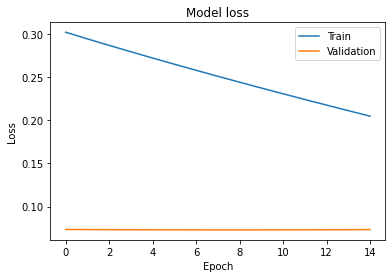

9/9 [==============================] - 0s 3ms/step
Mean squared error:  1.7576683362287435
Root mean squared error:  1.3257708460472133
Mean absolute error:  0.9363088459069177
R2 score:  -0.7576683362287435


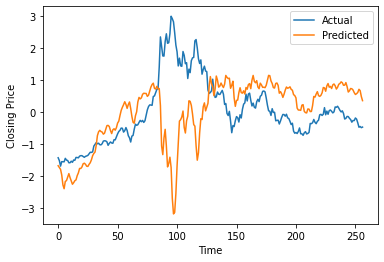

In [18]:
model5 = Sequential()
model5.add(LSTM(50, input_shape=(window_size, 1)))
model5.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000005)
model5.compile(loss='mean_squared_error', optimizer= optimizer)

history = model5.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model5,x_test,y_test)

Modelo 6: window_size = 3

Epoch 1/250
111/111 [==============================] - 5s 18ms/step - loss: 0.2897 - val_loss: 0.0697
Epoch 2/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2867 - val_loss: 0.0695
Epoch 3/250
111/111 [==============================] - 1s 8ms/step - loss: 0.2837 - val_loss: 0.0693
Epoch 4/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2807 - val_loss: 0.0692
Epoch 5/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2777 - val_loss: 0.0690
Epoch 6/250
111/111 [==============================] - 1s 8ms/step - loss: 0.2748 - val_loss: 0.0688
Epoch 7/250
111/111 [==============================] - 1s 8ms/step - loss: 0.2719 - val_loss: 0.0687
Epoch 8/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2690 - val_loss: 0.0685
Epoch 9/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2661 - val_loss: 0.0683
Epoch 10/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2632 - val_l

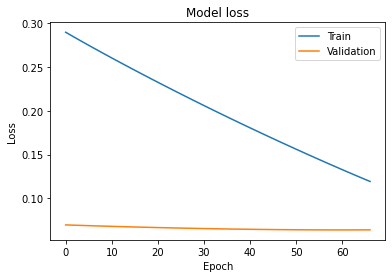

9/9 [==============================] - 1s 8ms/step
Mean squared error:  0.09276541863240914
Root mean squared error:  0.30457415949553096
Mean absolute error:  0.22591603940946423
R2 score:  0.9072345813675908


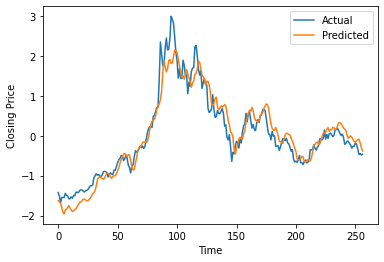

In [19]:
model6 = Sequential()
model6.add(LSTM(150, input_shape=(window_size, 1)))
model6.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model6.compile(loss='mean_squared_error', optimizer= optimizer)

history = model6.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model6,x_test,y_test)

Epoch 1/250
111/111 [==============================] - 4s 13ms/step - loss: 0.0261 - val_loss: 0.0792
Epoch 2/250
111/111 [==============================] - 1s 7ms/step - loss: 7.1962e-04 - val_loss: 0.0552
Epoch 3/250
111/111 [==============================] - 1s 7ms/step - loss: 3.6723e-04 - val_loss: 0.0354
Epoch 4/250
111/111 [==============================] - 1s 8ms/step - loss: 1.5573e-04 - val_loss: 0.0229
Epoch 5/250
111/111 [==============================] - 1s 7ms/step - loss: 7.4239e-05 - val_loss: 0.0168
Epoch 6/250
111/111 [==============================] - 1s 7ms/step - loss: 6.0099e-05 - val_loss: 0.0150
Epoch 7/250
111/111 [==============================] - 1s 7ms/step - loss: 6.7964e-05 - val_loss: 0.0146
Epoch 8/250
111/111 [==============================] - 1s 7ms/step - loss: 6.2253e-05 - val_loss: 0.0144
Epoch 9/250
111/111 [==============================] - 1s 8ms/step - loss: 6.2035e-05 - val_loss: 0.0142
Epoch 10/250
111/111 [==============================] - 1s

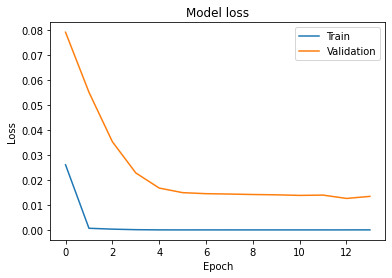

9/9 [==============================] - 1s 4ms/step
Mean squared error:  0.285245045984264
Root mean squared error:  0.5340833698817666
Mean absolute error:  0.4173117177701745
R2 score:  0.7147549540157361


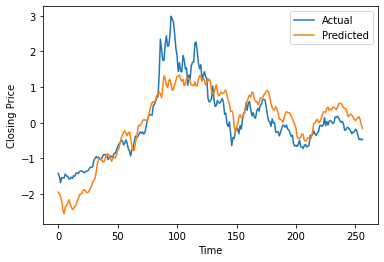

In [20]:
model6 = Sequential()
model6.add(LSTM(150, input_shape=(window_size, 1)))
model6.add(Dense(1))
optimizer = keras.optimizers.Adam()
model6.compile(loss='mean_squared_error', optimizer= optimizer)

history = model6.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model6,x_test,y_test)